<a href="https://colab.research.google.com/github/anacasicande/Modelamiento/blob/main/Tarea_3_jacobo_definitiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
#datos
Reflux_ratio=2.5 # L/D
flow_rate=1000 #mol/h
z1=0.06
z2=0.17
z3=0.22
z4=0.20
z5=0.35
t2=140 # farenheit
t3=150 # farenheit
t4=160 # farenheit
t5=170 # farenheit
t6=180 # farenheit
t7=190 # farenheit
t8=200 # farenheit
t9=210 # farenheit
t10=220 # farenheit
t11=230 # farenheit
#constantes para las 5 especies
a1=0.7
a2=2.21
a3=1.5
a4=0.86
a5=0.71
b1=0.003
b2=0.0195
b3=-0.016
b4=-0.0097
b5=-0.0087
y1=0.000065
y2=0.000090
y3=0.000080
y4=0.000046
y5=0.000042
a = np.array([0.70, 2.21, 1.50, 0.86, 0.71])
b = np.array([0.30e-2, 1.95e-2, -1.60e-2, -0.97e-2, -0.87e-2])
temperaturas_F = np.array([0,140, 150, 160, 170, 180, 190, 200, 210, 220, 230])
z_F = np.array([0.06, 0.17, 0.22, 0.20, 0.35])
y = np.array([0.65e-4, 0.90e-4, 0.80e-4, 0.46e-4, 0.42e-4])


In [6]:
import numpy as np
def valores_a_j_6(z):
    # Use NumPy broadcasting to multiply each element of the array by 1000
    z = 1000 * z
    return z
temperaturas_K = [(T - 32) * 5/9 + 273.15 for T in temperaturas_F]
def calculo_k(T, a, b, y):

    K = np.zeros((len(T), len(a)))


    for i in range(1, len(T)):
        for k in range(len(a)):
            # Usamos la fórmula K_{i,k} = a_k + b_k * T_i + y_k * T_i^2
            K[i, k] = a[k] + b[k] * T[i] + y[k] * T[i]**2

    return K
k=calculo_k(temperaturas_F, a, b, y)
print(k)

[[ 0.      0.      0.      0.      0.    ]
 [ 2.394   6.704   0.828   0.4036  0.3152]
 [ 2.6125  7.16    0.9     0.44    0.35  ]
 [ 2.844   7.634   0.988   0.4856  0.3932]
 [ 3.0885  8.126   1.092   0.5404  0.4448]
 [ 3.346   8.636   1.212   0.6044  0.5048]
 [ 3.6165  9.164   1.348   0.6776  0.5732]
 [ 3.9     9.71    1.5     0.76    0.65  ]
 [ 4.1965 10.274   1.668   0.8516  0.7352]
 [ 4.506  10.856   1.852   0.9524  0.8288]
 [ 4.8285 11.456   2.052   1.0624  0.9308]]


In [10]:




def valores_a(k):
    L = 1250  # Ejemplo de flujo de líquido en mol/h
    V = 1750  # Ejemplo de flujo de vapor en mol/h
# Inicializamos una lista para almacenar los valores de a
    a_values = np.zeros_like(k)
# Calculamos los valores de a para cada Kij
    for i in range(k.shape[0]):  # Itera sobre las filas
       for j in range(k.shape[1]):  # Itera sobre las columnas
           if k[i, j]==0:
              a_values[i,j]=L/500

           else:
              a_values[i, j] = (L / (V * k[i, j]))
    return a_values
# Mostramos los resultados
A=valores_a(k)
print(
      A)



[[2.5        2.5        2.5        2.5        2.5       ]
 [0.29836496 0.1065462  0.86266391 1.76978621 2.26613488]
 [0.2734108  0.09976057 0.79365079 1.62337662 2.04081633]
 [0.25115531 0.09356638 0.72296125 1.47093434 1.81659642]
 [0.23127269 0.08790127 0.6541078  1.32177223 1.60585817]
 [0.21347451 0.08271025 0.58934465 1.18180959 1.41498755]
 [0.19750746 0.07794475 0.52988554 1.05414066 1.24613698]
 [0.18315018 0.07356187 0.47619048 0.93984962 1.0989011 ]
 [0.17020987 0.06952362 0.42822885 0.8387573  0.97155293]
 [0.1585188  0.0657964  0.38568343 0.749985   0.86183122]
 [0.14793118 0.06235036 0.34809245 0.67233219 0.76738904]]


In [11]:
import numpy as np

# Función que convierte cada columna de la matriz en un vector separado
def transformar_matriz_en_vectores(matriz):
    # Obtener las dimensiones de la matriz
    n, m = matriz.shape

    # Crear una lista de vectores de longitud n (una por cada columna de la matriz)
    vectores = [matriz[:, j] for j in range(m)]

    return vectores

# Transformar la matriz en vectores
vectores = transformar_matriz_en_vectores(A)

# Mostrar los vectores resultantes
for i, vec in enumerate(vectores):
    print(f"Vector {i+1}: {vec}")


Vector 1: [2.5        0.29836496 0.2734108  0.25115531 0.23127269 0.21347451
 0.19750746 0.18315018 0.17020987 0.1585188  0.14793118]
Vector 2: [2.5        0.1065462  0.09976057 0.09356638 0.08790127 0.08271025
 0.07794475 0.07356187 0.06952362 0.0657964  0.06235036]
Vector 3: [2.5        0.86266391 0.79365079 0.72296125 0.6541078  0.58934465
 0.52988554 0.47619048 0.42822885 0.38568343 0.34809245]
Vector 4: [2.5        1.76978621 1.62337662 1.47093434 1.32177223 1.18180959
 1.05414066 0.93984962 0.8387573  0.749985   0.67233219]
Vector 5: [2.5        2.26613488 2.04081633 1.81659642 1.60585817 1.41498755
 1.24613698 1.0989011  0.97155293 0.86183122 0.76738904]


In [12]:
import sympy as sp
import numpy as np

def valores_a_j_6(z):
    # Multiplicar cada elemento del array por 1000
    return 1000 * z

# Función para generar el sistema de ecuaciones basado en un array o lista
def generar_sistema_ecuaciones(vector):
    if isinstance(vector, np.ndarray):
        vector = vector.tolist()

    n = len(vector)
    x = sp.symbols(f'x1:{n+1}')
    ecuaciones = [sp.Eq(x[0], vector[0] + 1)]

    for i in range(1, n):
        ecuacion = sp.Eq(-vector[i] * x[i-1] + x[i], 1)
        ecuaciones.append(ecuacion)

    return ecuaciones, x

def ecuaciones_a_matriz(ecuaciones, variables):
    n = len(variables)
    A = np.zeros((n, n))
    b = np.zeros(n)

    for i, eq in enumerate(ecuaciones):
        lhs, rhs = eq.lhs, eq.rhs
        b[i] = float(rhs)

        for var in variables:
            if var in lhs.free_symbols:
                A[i, variables.index(var)] = float(lhs.coeff(var))

    return A, b

def juntar_matriz_y_vector(A, b):
    return np.hstack((A, b.reshape(-1, 1)))

def gaussian_elimination(matrix):
    matrix = [list(row) for row in matrix]
    rows = len(matrix)
    cols = len(matrix[0])

    for i in range(min(rows, cols)):
        max_row = max(range(i, rows), key=lambda x: abs(matrix[x][i]))
        matrix[i], matrix[max_row] = matrix[max_row], matrix[i]

        if matrix[i][i] == 0:
            raise ValueError("La matriz es singular.")

        for j in range(i + 1, rows):
            factor = matrix[j][i] / matrix[i][i]
            for k in range(i, cols):
                matrix[j][k] -= factor * matrix[i][k]
            matrix[j][i] = 0

    return matrix

# Definir los vectores
vectores = [
    np.array([2.5, 0.45964332, 0.41710115, 0.37913254, 0.34531579,
              0.31521876, 0.28842549, 0.26455026, 0.2432439, 0.22419514, 0.20712939]),
    np.array([2.5, 0.57418466, 0.54525627, 0.51240008, 0.47746371,
              0.44200849, 0.40723245, 0.37397158, 0.34274746, 0.31383379, 0.2873233]),
    np.array([2.5, 0.13456777, 0.12531328, 0.11694265, 0.10935176,
              0.10245062, 0.09616124, 0.09041591, 0.08515566, 0.08032903, 0.07589096]),
    np.array([2.5, 0.22896708, 0.21321962, 0.19898755, 0.18608944,
              0.17436913, 0.16369184, 0.15394089, 0.14501497, 0.13682586, 0.12929652]),
    np.array([2.5, 0.25962697, 0.24131274, 0.2248161, 0.20991117,
              0.196405, 0.18413222, 0.17295054, 0.16273711, 0.15338553, 0.1448033]),
]

for idx, vector in enumerate(vectores, start=1):
    sistema, variables = generar_sistema_ecuaciones(vector)
    A, b = ecuaciones_a_matriz(sistema, variables)
    matriz_extendida = juntar_matriz_y_vector(A, b)

    print(f"\nMatriz de coeficientes A para el Vector {idx}:")
    print(A)
    print(f"\nVector de constantes b para el Vector {idx}:")
    print(b)
    print(f"\nMatriz extendida [A | b] para el Vector {idx}:")
    print(matriz_extendida)

    print(f"\nSistema de ecuaciones para el Vector {idx}:")
    for eq in sistema:
        sp.pprint(eq)

    print(f"\nMatriz extendida tras la eliminación gaussiana para el Vector {idx}:")
    resultado = gaussian_elimination(matriz_extendida)
    for fila in resultado:
        print(fila)



Matriz de coeficientes A para el Vector 1:
[[ 1.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.        ]
 [-0.45964332  1.          0.          0.          0.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.         -0.41710115  1.          0.          0.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.          0.         -0.37913254  1.          0.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.         -0.34531579  1.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.         -0.31521876  1.
   0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.         -0.28842549
   1.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.    

In [24]:
import sympy as sp
import numpy as np

def valores_a_j_6(z):
    return 1000 * z

def generar_sistema_ecuaciones(vector, indices):
    if isinstance(vector, np.ndarray):
        vector = vector.tolist()

    n = len(indices)
    x = sp.symbols(f'x1:{n+1}')
    ecuaciones = [sp.Eq(x[0], vector[indices[0]] + 1)]

    for i in range(1, n):
        ecuacion = sp.Eq(-vector[indices[i]] * x[i-1] + x[i], 1)
        ecuaciones.append(ecuacion)

    return ecuaciones, x

def ecuaciones_a_matriz(ecuaciones, variables):
    n = len(variables)
    A = np.zeros((n, n))
    b = np.zeros(n)

    for i, eq in enumerate(ecuaciones):
        lhs, rhs = eq.lhs, eq.rhs
        b[i] = float(rhs)

        for var in variables:
            if var in lhs.free_symbols:
                A[i, variables.index(var)] = float(lhs.coeff(var))

    return A, b

def juntar_matriz_y_vector(A, b):
    return np.hstack((A, b.reshape(-1, 1)))

def gaussian_elimination(matrix):
    matrix = [list(row) for row in matrix]
    rows = len(matrix)
    cols = len(matrix[0])

    for i in range(min(rows, cols)):
        max_row = max(range(i, rows), key=lambda x: abs(matrix[x][i]))
        matrix[i], matrix[max_row] = matrix[max_row], matrix[i]

        if matrix[i][i] == 0:
            raise ValueError("La matriz es singular.")

        for j in range(i + 1, rows):
            factor = matrix[j][i] / matrix[i][i]
            for k in range(i, cols):
                matrix[j][k] -= factor * matrix[i][k]
            matrix[j][i] = 0

    return matrix

def resolver_matriz_indices(vectores, indices):
    for idx, vector in enumerate(vectores, start=1):
        sistema, variables = generar_sistema_ecuaciones(vector, indices)
        A, b = ecuaciones_a_matriz(sistema, variables)
        matriz_extendida = juntar_matriz_y_vector(A, b)

        print(f"\nMatriz de coeficientes A para el Vector {idx}:")
        print(A)
        print(f"\nVector de constantes b para el Vector {idx}:")
        print(b)
        print(f"\nMatriz extendida [A | b] para el Vector {idx}:")
        print(matriz_extendida)

        print(f"\nSistema de ecuaciones para el Vector {idx}:")
        for eq in sistema:
            sp.pprint(eq)

        print(f"\nMatriz extendida tras la eliminación gaussiana para el Vector {idx}:")
        resultado = gaussian_elimination(matriz_extendida)
        for fila in resultado:
            print(fila)

# Definir los vectores
vectores = [
    np.array([2.5, 0.45964332, 0.41710115, 0.37913254, 0.34531579,
              0.31521876, 0.28842549, 0.26455026, 0.2432439, 0.22419514, 0.20712939]),
    np.array([2.5, 0.57418466, 0.54525627, 0.51240008, 0.47746371,
              0.44200849, 0.40723245, 0.37397158, 0.34274746, 0.31383379, 0.2873233]),
    np.array([2.5, 0.13456777, 0.12531328, 0.11694265, 0.10935176,
              0.10245062, 0.09616124, 0.09041591, 0.08515566, 0.08032903, 0.07589096]),
    np.array([2.5, 0.22896708, 0.21321962, 0.19898755, 0.18608944,
              0.17436913, 0.16369184, 0.15394089, 0.14501497, 0.13682586, 0.12929652]),
    np.array([2.5, 0.25962697, 0.24131274, 0.2248161, 0.20991117,
              0.196405, 0.18413222, 0.17295054, 0.16273711, 0.15338553, 0.1448033]),
]

# Resolver para los índices de 1 a 5
resolver_matriz_indices(vectores, indices=[0, 1, 2, 3, 4])

# Resolver para los índices de 7 a 11
resolver_matriz_indices(vectores, indices=[6, 7, 8, 9, 10])



Matriz de coeficientes A para el Vector 1:
[[ 1.          0.          0.          0.          0.        ]
 [-0.45964332  1.          0.          0.          0.        ]
 [ 0.         -0.41710115  1.          0.          0.        ]
 [ 0.          0.         -0.37913254  1.          0.        ]
 [ 0.          0.          0.         -0.34531579  1.        ]]

Vector de constantes b para el Vector 1:
[3.5 1.  1.  1.  1. ]

Matriz extendida [A | b] para el Vector 1:
[[ 1.          0.          0.          0.          0.          3.5       ]
 [-0.45964332  1.          0.          0.          0.          1.        ]
 [ 0.         -0.41710115  1.          0.          0.          1.        ]
 [ 0.          0.         -0.37913254  1.          0.          1.        ]
 [ 0.          0.          0.         -0.34531579  1.          1.        ]]

Sistema de ecuaciones para el Vector 1:
x₁ = 3.5
-0.45964332⋅x₁ + x₂ = 1
-0.41710115⋅x₂ + x₃ = 1
-0.37913254⋅x₃ + x₄ = 1
-0.34531579⋅x₄ + x₅ = 1

Matriz ex

In [37]:
import sympy as sp
import numpy as np

# Función para realizar la sustitución hacia atrás
def back_substitution(matrix):
    rows, cols = matrix.shape
    x = np.zeros(rows)

    # Realizar sustitución hacia atrás
    for i in range(rows - 1, -1, -1):
        x[i] = matrix[i, -1] / matrix[i, i]
        for j in range(i - 1, -1, -1):
            matrix[j, -1] -= matrix[j, i] * x[i]

    return x
valores_x_1_5 = []
valores_x_7_11 = []
# Resolver para los índices de 1 a 5
for idx, vector in enumerate(vectores, start=1):
    # Generar el sistema de ecuaciones
    sistema, variables = generar_sistema_ecuaciones(vector, indices=[0, 1, 2, 3, 4])

    # Convertir el sistema de ecuaciones en una matriz de coeficientes y un vector de constantes
    A, b = ecuaciones_a_matriz(sistema, variables)
    matriz_extendida = juntar_matriz_y_vector(A, b)

    # Aplicar eliminación gaussiana
    resultado = gaussian_elimination(matriz_extendida)

    # Obtener los valores de x_ij con sustitución hacia atrás
    resultado_np = np.array(resultado)
    valores_x = back_substitution(resultado_np)
    valores_x_1_5.append(valores_x)
    # Mostrar los valores de las incógnitas x_ij
    print(f"\nValores de las incógnitas x_ij para el Vector {idx}:")
    for j, valor in enumerate(valores_x, start=1):
        print(f"x{j} = {valor}")

# Resolver para los índices de 7 a 11
for idx, vector in enumerate(vectores, start=1):
    # Generar el sistema de ecuaciones
    sistema, variables = generar_sistema_ecuaciones(vector, indices=[6, 7, 8, 9, 10])

    # Convertir el sistema de ecuaciones en una matriz de coeficientes y un vector de constantes
    A, b = ecuaciones_a_matriz(sistema, variables)
    matriz_extendida = juntar_matriz_y_vector(A, b)

    # Aplicar eliminación gaussiana
    resultado = gaussian_elimination(matriz_extendida)

    # Obtener los valores de x_ij con sustitución hacia atrás
    resultado_np = np.array(resultado)
    valores_x = back_substitution(resultado_np)
    valores_x_7_11.append(valores_x)
    # Mostrar los valores de las incógnitas x_ij
    print(f"\nValores de las incógnitas x_ij para el Vector {idx}:")
    for j, valor in enumerate(valores_x, start=1):
        print(f"x{j + 6} = {valor}")  # x{j + 5} para las incógnitas de la segunda parte



Valores de las incógnitas x_ij para el Vector 1:
x1 = 3.5
x2 = 2.60875162
x3 = 2.088113300766363
x4 = 1.7916716995273352
x5 = 1.6186925283429243

Valores de las incógnitas x_ij para el Vector 2:
x1 = 3.5
x2 = 3.00964631
x3 = 2.6410285210098636
x4 = 2.353263225447736
x5 = 2.1235977902288425

Valores de las incógnitas x_ij para el Vector 3:
x1 = 3.5
x2 = 1.470987195
x3 = 1.1843342302434496
x4 = 1.1384991833703793
x5 = 1.1244968894601137

Valores de las incógnitas x_ij para el Vector 4:
x1 = 3.5
x2 = 1.80138478
x3 = 1.3840905782653836
x4 = 1.2754167931471119
x5 = 1.2373415968033419

Valores de las incógnitas x_ij para el Vector 5:
x1 = 3.5
x2 = 1.908694395
x3 = 1.4605922742800923
x4 = 1.3283646587937805
x5 = 1.2788385797140533

Valores de las incógnitas x_ij para el Vector 1:
x7 = 1.28842549
x8 = 1.3408532983701273
x9 = 1.3261543856234135
x10 = 1.2973173681464552
x11 = 1.2687125551005807

Valores de las incógnitas x_ij para el Vector 2:
x7 = 1.40723245
x8 = 1.526264942753771
x9 = 1.52312

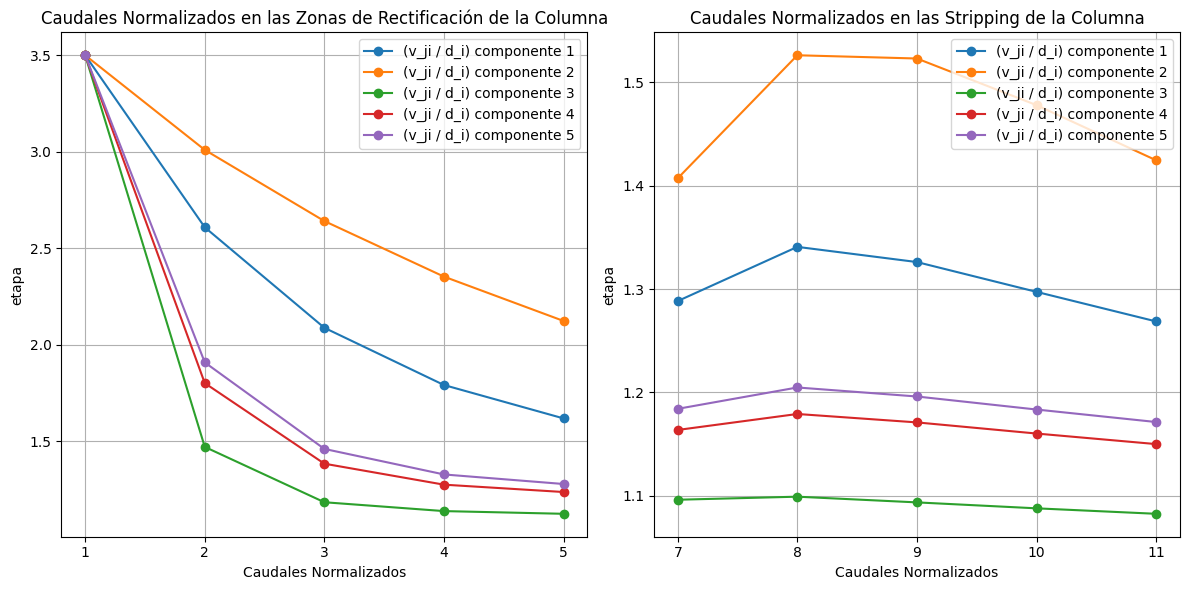

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Gráfica para valores de x de 1 a 5
plt.subplot(1, 2, 1)
for idx, valores in enumerate(valores_x_1_5, start=1):
    plt.plot(range(1, 6), valores, marker='o', label=f'(v_ji / d_i) componente {idx}')
plt.title('Caudales Normalizados en las Zonas de Rectificación de la Columna')
plt.xlabel('Caudales Normalizados')
plt.ylabel('etapa')
plt.xticks(range(1, 6))
plt.legend()
plt.grid()

# Gráfica para valores de x de 7 a 11
plt.subplot(1, 2, 2)
for idx, valores in enumerate(valores_x_7_11, start=1):
    plt.plot(range(7, 12), valores, marker='o', label=f'(v_ji / d_i) componente {idx}')
plt.title('Caudales Normalizados en las Stripping de la Columna')
plt.xlabel('Caudales Normalizados')
plt.ylabel('etapa')
plt.xticks(range(7, 12))
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()